In [16]:
# Tasks:
# On the Following Dataset,
# 1 Data Loading
# 2 Data Visualization
# 3 Data Preprocessing
# 4 Clustering 

In [17]:
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [18]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# Combine the datasets into a single DataFrame
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019]
df = pd.concat(df_list, ignore_index=True)

# Check the structure of the DataFrame
print(df.info())
print(df.head())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Region                         315 non-null    object 
 2   Happiness Rank                 315 non-null    float64
 3   Happiness Score                315 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       315 non-null    float64
 6   Family                         470 non-null    float64
 7   Health (Life Expectancy)       315 non-null    float64
 8   Freedom                        470 non-null    float64
 9   Trust (Government Corruption)  315 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              315 non-null    float64
 12  Year                           782 non-null    int

In [19]:
# Drop columns with a significant number of missing values or irrelevant columns
columns_to_drop = ['Standard Error', 'Lower Confidence Interval', 'Upper Confidence Interval',
                   'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
                   'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
                   'Dystopia.Residual', 'Overall rank', 'Country or region', 'Generosity']

df = df.drop(columns=columns_to_drop, axis=1)

# Drop rows with any remaining missing values
df = df.dropna()

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Region', 'Country'], drop_first=True)
# Remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]

# Check for missing values again
print(df.isnull().sum())
print(df.info())
print(df.head())

Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Dystopia Residual                0
Year                             0
Score                            0
GDP per capita                   0
Social support                   0
Healthy life expectancy          0
Freedom to make life choices     0
Perceptions of corruption        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 0 non-null      float64
 1   Happiness Score                0 non-null      float64
 2   Economy (GDP per Capita)       0 non-null      float64
 3   Family                         0 non-null      float64
 4   Health (L

In [26]:
# # Handle missing values by dropping rows with more than 2 missing values
df = df.dropna(thresh=df.shape[1] - 2)

# Ensure the DataFrame is not empty
print(df.shape)
if df.empty:
    print("DataFrame is empty after dropping rows with missing values.")
else:
    print("DataFrame is not empty.")
    

(0, 15)
DataFrame is empty after dropping rows with missing values.


In [21]:
print(df.dtypes)


Happiness Rank                   float64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
Year                               int64
Score                            float64
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Perceptions of corruption        float64
dtype: object


In [22]:
print(df.describe())

       Happiness Rank  Happiness Score  Economy (GDP per Capita)  Family  \
count             0.0              0.0                       0.0     0.0   
mean              NaN              NaN                       NaN     NaN   
std               NaN              NaN                       NaN     NaN   
min               NaN              NaN                       NaN     NaN   
25%               NaN              NaN                       NaN     NaN   
50%               NaN              NaN                       NaN     NaN   
75%               NaN              NaN                       NaN     NaN   
max               NaN              NaN                       NaN     NaN   

       Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
count                       0.0      0.0                            0.0   
mean                        NaN      NaN                            NaN   
std                         NaN      NaN                            NaN   
min            

In [23]:
# Select numerical columns to scale
numeric_cols_to_scale = df_combined.select_dtypes(include=['float64', 'int64']).columns

# Check if the DataFrame is empty or if there are no columns to scale
if df_combined.empty or numeric_cols_to_scale.empty:
    raise ValueError("The DataFrame is empty or has no numerical columns to scale.")

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_combined_imputed = pd.DataFrame(imputer.fit_transform(df_combined[numeric_cols_to_scale]), columns=numeric_cols_to_scale)

# Verify if the imputed DataFrame is empty
print("Imputed DataFrame shape:", df_combined_imputed.shape)
if df_combined_imputed.empty:
    raise ValueError("The DataFrame is empty after imputation.")

# Standardize the features
scaler = StandardScaler()
df_combined_scaled = pd.DataFrame(scaler.fit_transform(df_combined_imputed), columns=numeric_cols_to_scale)
print("Scaled DataFrame Head:")
print(df_combined_scaled.head())

Imputed DataFrame shape: (782, 28)
Scaled DataFrame Head:
   Happiness Rank  Happiness Score  Standard Error  Economy (GDP per Capita)  \
0       -2.711278         3.052530       -1.792957                  1.908094   
1       -2.676624         3.016586        0.124338                  1.546239   
2       -2.641970         2.969583       -1.900992                  1.635214   
3       -2.607316         2.962671       -1.182494                  2.148166   
4       -2.572661         2.831337       -1.608126                  1.638326   

     Family  Health (Life Expectancy)   Freedom  \
0  1.455182                  2.276661  2.256455   
1  1.668781                  2.318672  1.940414   
2  1.500033                  1.838927  2.117414   
3  1.379984                  1.908202  2.292182   
4  1.346194                  2.042032  1.976484   

   Trust (Government Corruption)  Generosity  Dystopia Residual  ...  \
0                       3.815785    0.639746           0.862449  ...   
1         

C:\Users\Acer\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


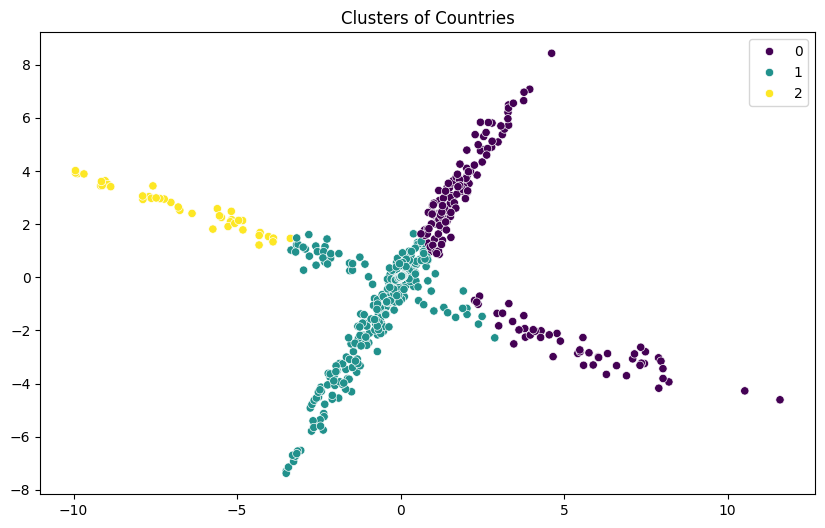

In [24]:
#Clustering:  Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_combined_scaled)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Add clusters to the DataFrame
df_combined['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters of Countries')
plt.show()